# **Outlier Detection with Density Based Spatial Clustering of Applications with Noise (DBSCAN)**

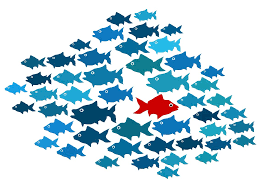

# **Theory and Intuition**

Cluster analysis or clustering is the task of grouping a set of points in such a way that objects in the same group are more similar to each other than to those in other groups.

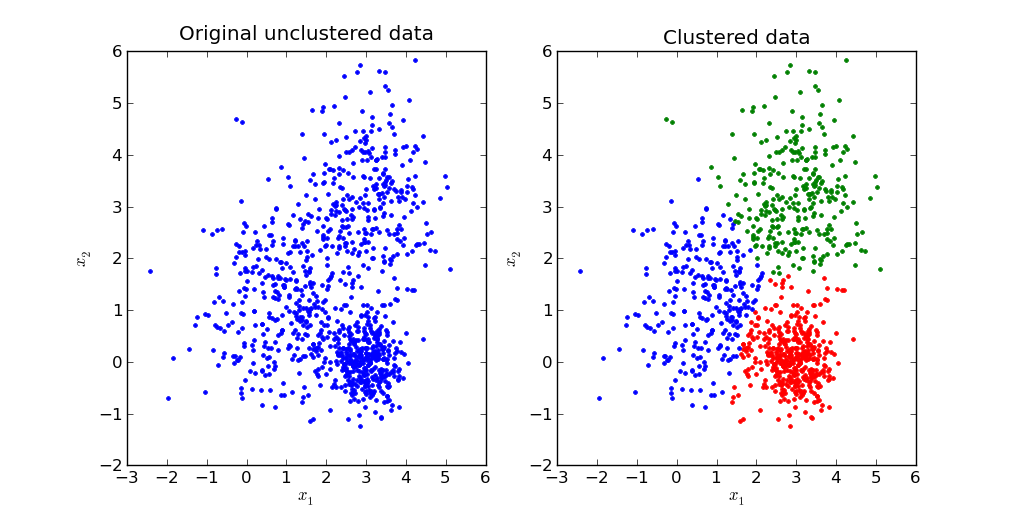

DBSCAN focuses on using density of points as its main factor for assigning cluster labels. This allows for the algorithm to find cluster segmentation that other algorithms may have difficulty with.

DBSCAN iterates through the points of a dataset and uses two key hyperparameters to assign cluster labels:

- Epsilon = Distance extended from a point
- Minimum Number of Points = The minimum number of points in an epsilon distance

When running the DBSCAN algorithm, there are three point types the algorithm considers:

- Core point = A point with a minimum number of points surrounding it within epsilon distance (including itself).
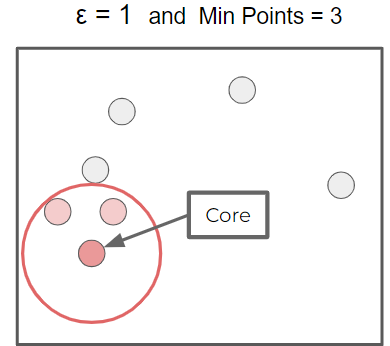


- Border = Point within epsilon range of a Core point, but it does not contain a minumum number of points surrounding it within epsilon distance.

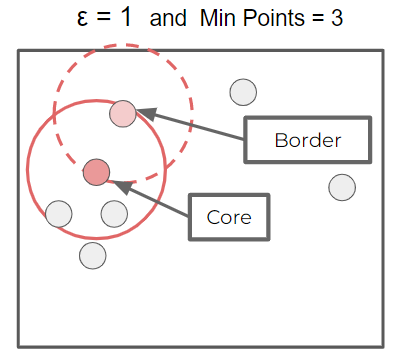

- Outlier = Cannot be "reached" by points in a cluster assignment.

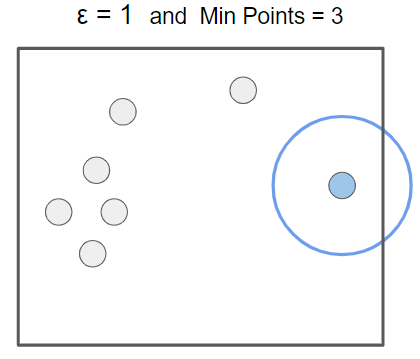

# **Procedure**


1. Pick a random point not yet assigned.
2. Determine the point type.
3. Once a core point has been found, add all directly reachable points to the same cluster as core.
4. Repeat until all points have been assigned to a cluster or as an outlier.


# **Implemenation in Python**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Here, I am using sample data of two distinct clusters of points and three outliers. Note, the three outliers are considered outliers in the sense that they do not follow the general trend. However, these outliers are not extreme values relative to the other points in the data, so using measures of central tendency and dispersion to detect them would be difficult.

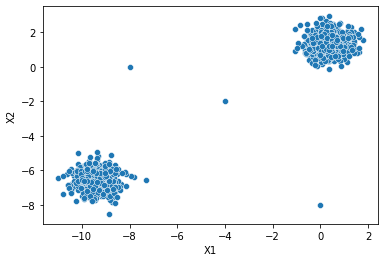

In [10]:
blobs = pd.read_csv('cluster_two_blobs_outliers.csv')
sns.scatterplot(data=blobs, x="X1", y="X2");

Defining a function to help visualize the labels assigned by DBSCAN

In [17]:
def display_categories(data, model):
  labels = model.fit_predict(data)
  sns.scatterplot(data=data, x="X1", y='X2', hue=labels, palette='Set1')

In [13]:
from sklearn.cluster import DBSCAN

**Using default values of DBSCAN**

In [18]:
model = DBSCAN()

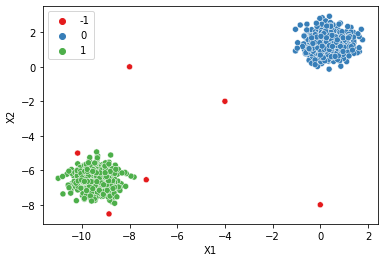

In [19]:
display_categories(blobs, model)

On the upperleft corner of the plot, we can see the legend of the labels assigned by the model. Values zero and one correspond to clusters, while negative one corresponds to outliers. Here, the default parameters of the model identified six points as outliers. Whether this is correct depends on us as practitioners to asses. I will attempt to tune the models parameters to only classify the three points in the center as outliers. In this sense, we decide what the tolerance is for detecting outliers.

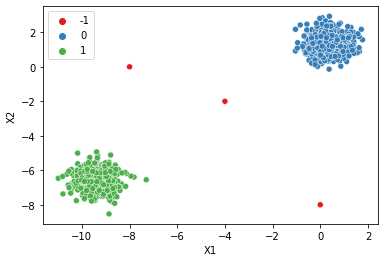

In [20]:
model = DBSCAN(eps=0.7)
display_categories(blobs, model)

By only adjusting the epsilon parameter, we are now able to classify the two blobs as individual clusters and the three data points in the middle as outliers.

Lets look at one more example. In this data set, we see two crescent moons close together, and one point on the right somewhat separated from the rest. We can train our model to detect the clusters and identify the outlier.

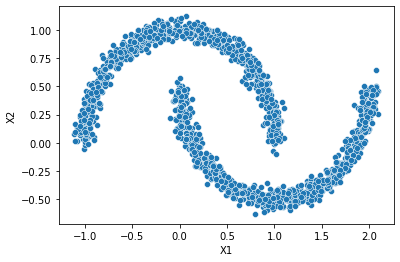

In [21]:
moons = pd.read_csv('cluster_moons.csv')
sns.scatterplot(data=moons, x="X1", y="X2");

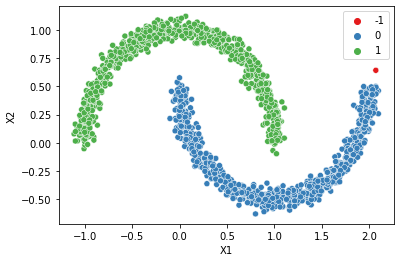

In [29]:
model = DBSCAN(eps=0.1, min_samples=3)
display_categories(moons, model)

# **Remarks**
DBSCAN is a powerful algorithm that given a set of points in some space, it groups together points that are closely packed together (points with many nearby neighbors), marking as outliers points that lie alone in low-density regions (whose nearest neighbors are too far away). DBSCAN is one of the most common clustering algorithms and also most cited in scientific literature. After my interview at wood, I considered the problem statement of detecting outliers and found applications of DBSCAN used in environmental and geographic settings to great success. ArcGIS also has a section on their webpage describing applications of DBSCAN to cluster and filter out noise. The usefulness of this algorithm and proper implementation could rapidly lead to a better anomaly detection system.